## Import all packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import repeat

## Load data


In [2]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [3]:
path = "Marketing_Campaign_Train.csv"
df = pd.read_csv(path, sep=',', on_bad_lines='skip', index_col=False)

# Data information

In [4]:
df.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

# Data statistics

In [6]:
# Describe the first ten columns 
df.iloc[:, 0:9].describe(include = 'all', datetime_is_numeric=True)

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency
count,1680.000000,1651.000000,1672,1646,1609.000000,1672.000000,1660.000000,1680,1680.000000
unique,NaN,NaN,5,6,NaN,NaN,NaN,634,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,14/02/2013,NaN
freq,NaN,NaN,830,653,NaN,NaN,NaN,10,NaN
mean,5584.735714,1969.047244,NaN,NaN,51983.554382,0.454545,0.503614,NaN,48.890476
std,3233.716033,11.937421,NaN,NaN,26567.679664,0.538492,0.544011,NaN,29.091872
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000
25%,2862.500000,1959.500000,NaN,NaN,34596.000000,0.000000,0.000000,NaN,24.000000
50%,5511.000000,1970.000000,NaN,NaN,50611.000000,0.000000,0.000000,NaN,50.000000
75%,8395.500000,1978.000000,NaN,NaN,67716.000000,1.000000,1.000000,NaN,74.000000


The columns in the table above give a general description of the customer. The general information includes - income, number of children, ID, level of education, etc. Generally, the completeness of the columns is pretty high. The column with the most missing values is 'Income' and there we have 71 missing values. This means 4.22% of the values in the 'Income' column are missing, which is relatively low. There is a few categorical attributes and a few numerical attributes in this table. Below, we have elaborated the conclusions from the table for each attribute. 

ID - This column produces no actual information about our costumer. Since, it is unique for every costumer and would not help predict the responses for the campaigns. For that reason, we have chosen to remove it from the data. 

Year_Birth - This column seems to have very similar median (1970) and mean (1969). Which could indicate a normal distribution. But we can already see it has some outliers. The minimal value for this column is 1893, which is about 7 std's from the mean. We would remove the outliers in the next preprocessing steps.

Education - This column has 5 unique values. Half of the entries have entered 'Graduation'. So, we can already assume the entries don't distributed uniformly between the values in this category. 

Status - This column has 6 unique values. Almost 700 of the entries have entered 'Married'. So, here again we can already assume the entries don't distributed uniformly between the values in this category. 

Income - This column seems to have a relatively close median (50611) and mean (51983). Because the mean is greater than the median, we can already assume we have entries with relatively high income which drag the mean upwards. This is a known phenomenon that high incomes affect the mean. In this case, looking at the median represents the distribution better. We can see in the table that the maximal value in this column is 23 std's higher than the mean. While the minimal value is only 2 std's smaller than the mean. In the following preprocessing steps, we would remove outliers from this column. 

Num_of_kids, Num_of_Teen - The data in both columns is very similar. The mean is about 0.5 and the median is 0. Because the values are discrete, and all people have between 0-2 kids/teens. These column could be considered, for analysis purposes, as categorical.

Registration_date - This column has almost a unique value for every entry. For that reason, we would extract the membership time in years and use it as a replacement for the information in this column. After extracting the membership time, we would remove this column from the data.

Recency - The distribution of values in this column is probably normal. Because, the mean and the median are very close. In addition, all values in the column are within 2 std's of the mean. In this table, we can't see any outliers.

In [7]:
# Describe column 9 (Mnt_Fruits) to column 19 (Num_Web_Visits) including
df.iloc[:, 9:20].describe(include = 'all', datetime_is_numeric=True)

,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits
count,1673.000000,1673.000000,1659.000000,1673.000000,1673.000000,1673.000000,1651.000000,1673.000000,1673.000000,1673.000000,1673.000000
mean,303.676031,25.224148,166.232068,35.998207,26.200239,43.646145,2.360388,4.101614,2.650329,5.736402,10.602510
std,340.672889,38.754356,227.583935,52.995401,40.894498,52.753288,1.974469,2.855441,3.022488,3.225084,5.030212
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,15.500000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,6.000000
50%,167.000000,8.000000,64.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,12.000000
75%,508.000000,30.000000,223.000000,47.000000,32.000000,55.000000,3.000000,6.000000,4.000000,8.000000,14.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,40.000000


The columns in the table above give an elaborate look on the shopping behavior of the customer. The data includes - amount of food bought in each category (sweets, fruits, wine, fish, etc.), number of purchases in store, number of purchases online, number of website visits, etc. All attributes in this table are numerical and all of them provide information about the costumer's behavior. Moreover, the entries in these columns are quite complete. The column with most missing values is 'Num_Web_Purchases' and it has 29 missing values. Below, we have 
described in more detail about the columns.

Mnt_... - The columns with the amount of food behave alike. The actual number of the mean changes for each column. But the mean is always between the median and the third precentile. Most of the time, the mean is closer to the third precentile than to the median. This finding probably indicates a postively skewed distribution. Moreover, the standard deviation is greater than the mean in all columns. This could indicate a high variation in these coulmns. 

Num_..._Purchases - The columns with numbers of purchases behave similarly. The mean is between the median and the third precentile. Only in these columns, the mean is closer to the median. This could indicate that the distribution is postively skewed. But it is less skewed than the distribution of the columns 'Mnt_...'. Also, in all columns except 'Num_Deals_Purchases', the standard deviation is lesser than the mean. This shows a smaller variation than in the columns of 'Mnt_...'.

Num_Web_Visits - This column has a mean of 10.6 and a median of 12. It seems like the distribution is close to normal. But becasue the mean is smaller than the median, that suggests a negatively skewed distribution. Even though the maximal value is 6 std's from the mean, while the minimal value is only 2 std's from the mean. We would need to plot the data for better understanding.

In [8]:
# Describe column 20 (Response_Campaign_1) to the last column (Response)
df.iloc[:, 20:29].describe(include = 'all', datetime_is_numeric=True)

,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000
mean,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214
std,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


The columns in the table above give information about the costumer's engament with the store. The information includes - responses for each campaign, complaints, cost to contact the costumer and revenue. Lastly, we would add a new column sum_responses_all_campaigns. This column would sum the total response for all campaigns for each costumer. Below, we would explain our conclusion for each column. 

Response_... - These columns contain the response (0/1) for each campaign. The third precentile is 0 for all columns, it seems that at least 75% of the costumers did not respond for any campaign. The first four campaigns have a mean close to 0.07, compared to the fifth campaign which has a mean of 0.01. This shows a total decrease in responses to the fifth campaign compared to the first four.

Complain - Here again the third precentile is 0, which indicates that at least 75% of costumers never complained. In addition, the mean is 0.009. This enforces the notion that most people did not complain, only a very smaller amount complained which increased the mean.

Cost_Contact, Revenue - Both columns provide no information at all. Since, all the entries for these columns is the same. For each costumer the cost of contact is 3 dollars and for each costumer the revenue is exactly 11 dollars. Therefore, we would remove these columns from the data.

Response - This column contains the response for the last campaign. If we compare the mean in the last campaign which is 0.14 compare to the mean of the first four campaigns which was 0.07, we can see an increase in responses. The last campaign for some reason got more responses for any other campaign. It can be shown in the increased mean.


### Remove unnecessary columns

In [9]:
# Changing date format from object to datetime
df['Registration_date'] = pd.to_datetime(df['Registration_date'], format='%d/%m/%Y')

# Add based on 'Registration_date' a new attributes that count the years of membership
df['Num_of_membership_years'] = datetime.now().year - pd.DatetimeIndex(df['Registration_date']).year

# Remove the following columns because the lack of information there
df = df.drop(['ID', 'Cost_Contact', 'Revenue', 'Registration_date'], axis = 1)

# Add column of factorized education and status columns
Education_num, unique = pd.factorize(df['Education']) 
df['Education_num'] = Education_num
Status_num, unique = pd.factorize(df['Status']) 
df['Status_num'] = Status_num

In [10]:
df.head()

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Num_of_membership_years,Education_num,Status_num
0,1979.0,Graduation,Married,NaN,1.0,0.0,42,1.0,1.0,1725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,9,0,0
1,1971.0,Graduation,Divorced,1730.0,0.0,0.0,65,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0,1
2,1991.0,Graduation,Single,8028.0,0.0,0.0,62,73.0,18.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,2
3,1967.0,2n Cycle,Together,67309.0,1.0,1.0,76,515.0,47.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,9,1,3
4,1982.0,PhD,Married,160803.0,0.0,0.0,21,55.0,16.0,1622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10,2,0


## Splitting the dataframe to target df, numerical data and nominal data

In [11]:
# Split data to target variables, nominal data and numerical data
# Target data
target_col = ['Response_Campaign_1','Response_Campaign_2','Response_Campaign_3','Response_Campaign_4','Response_Campaign_5', 'Response']
target = df[target_col]
target = target.fillna('NA')
# Numerical data
numeric_col = df.describe().columns 
numerical_data = df[numeric_col]
# Nominal data
nominal_data = df.drop(numeric_col, axis = 1).fillna('NA')
nominal_col = nominal_data.columns

## Numerical data - distributions|

#### Number of kids/teens

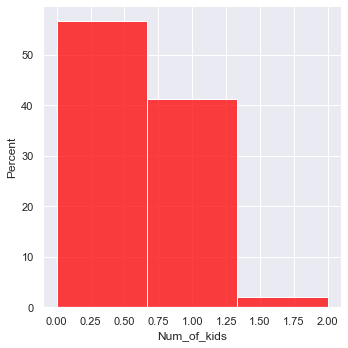

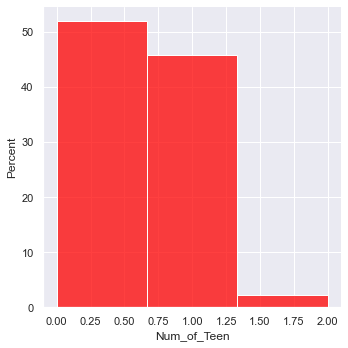

In [12]:
# Plot the bargraph for number of kids
sns.displot(numerical_data['Num_of_kids'], bins=3, color='red', stat='percent')
# Plot the bargraph for number of teens
sns.displot(numerical_data['Num_of_Teen'], bins=3, color='red', stat='percent')

It seems from the graph that more than 50% of the costumers have 0 kids/teens, about 45% have 1 teen and about 40% have 1 kid. ABout 2% have 2 kids/teens. This matches our initial analysis of the mean and median. It also seems like this attributes is categorical because all entires have one of these three values - 0,1,2.

#### Num_of_membership_years histogram

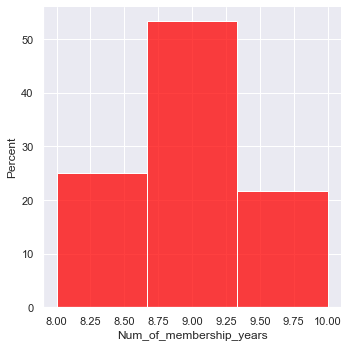

In [13]:
sns.displot(numerical_data['Num_of_membership_years'], bins=3, color='red', stat='percent') # kde=True    

Because this column has only three values - 8,9,10 this column could be considered categorical.

#### Complain histogram

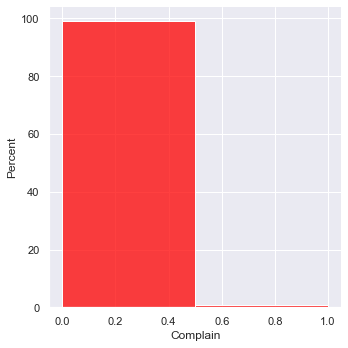

In [14]:
sns.displot(numerical_data['Complain'], bins=2, color='red', stat='percent') # kde=True    

Because this column has only two values - 0,1 this column could be considered categorical. Also, it seems like almost 100% of the people did not complain at all. We would remove this column.

In [15]:
# Remove the following column
df = df.drop('Complain', axis=1)

#### Check values in categorical attributes

In [16]:
cat_col = ['Num_of_kids', 'Num_of_Teen', 'Num_of_membership_years', 'Complain']
for col in cat_col:
    print(col, 'values: ')
    print(numerical_data[col].value_counts().sort_index())
    print('-----------------------------')

Num_of_kids values: 
0.0    947
1.0    690
2.0     35
Name: Num_of_kids, dtype: int64
-----------------------------
Num_of_Teen values: 
0.0    862
1.0    760
2.0     38
Name: Num_of_Teen, dtype: int64
-----------------------------
Num_of_membership_years values: 
8     420
9     897
10    363
Name: Num_of_membership_years, dtype: int64
-----------------------------
Complain values: 
0.0    1658
1.0      15
Name: Complain, dtype: int64
-----------------------------


#### Birth_Year distribution

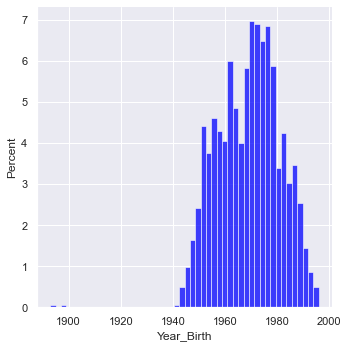

In [17]:
# Plot the histogram of 'Year_Birth'
sns.displot(numerical_data['Year_Birth'], bins=50, color='blue', stat='percent')

We can see in the histogram above that the data in for the birth year of the costumer is distributed normally. With a few outliers that have a birth year earlier than 1900. This goes along with our initial analysis of the mean and median of the data.

#### Income distribution

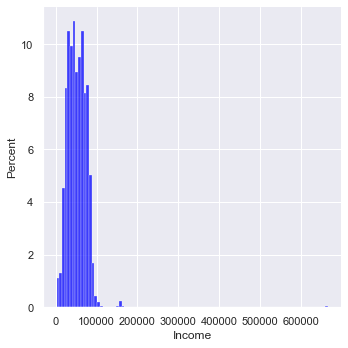

In [18]:
# Plot the histogram of 'Income'
sns.displot(numerical_data['Income'], bins=100, color='blue', stat='percent')

In the histogram above, we can see clearly that the income data has a few outliers on the positive side. But it seems like removing these outliers, will result in a data that is distributed normally as well.

#### Recency distribution

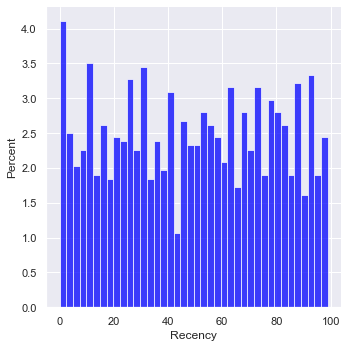

In [19]:
# Plot the histogram of the Recency
sns.displot(numerical_data['Recency'], bins=40, color='blue', stat='percent')

It looks like the data in the Recency column is distributed somewhat uniformly. 

#### Mnt_... columns distribution

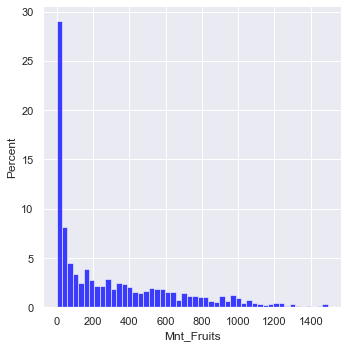

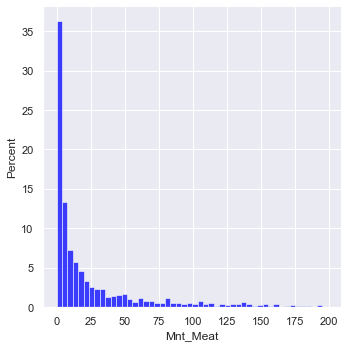

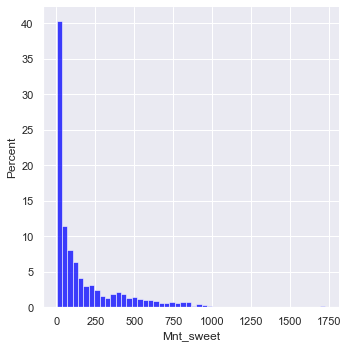

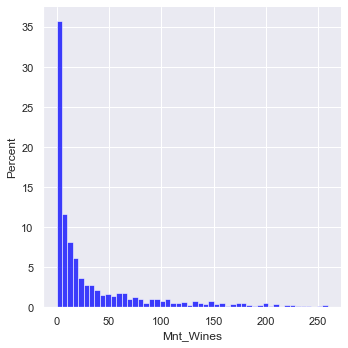

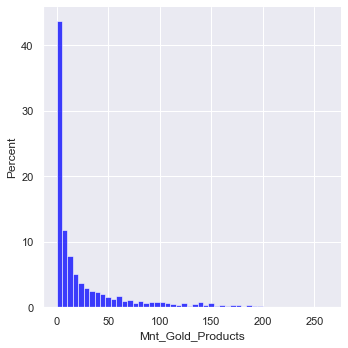

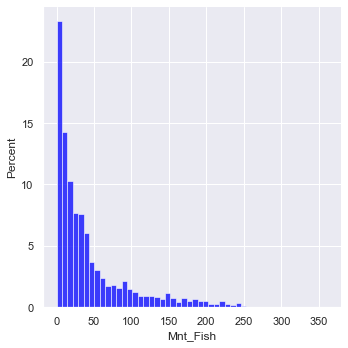

In [20]:
# Plot the histograms for the Mnt_... columns
Mnt_col = ['Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish'] 
for col in Mnt_col:
    sns.displot(numerical_data[col], bins=50, color='blue', stat='percent') # kde=True    

All of the Mnt_.. columns are highly asymetric to the postive side. They all have an exponential distribution.

#### Num_..._Purchases distributions

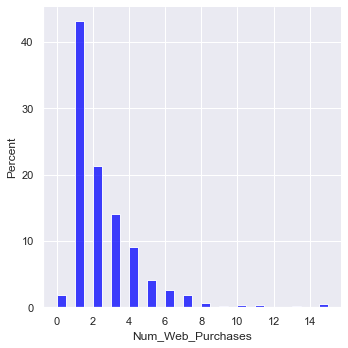

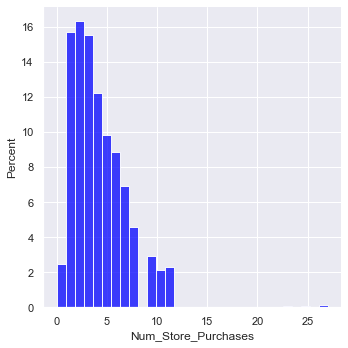

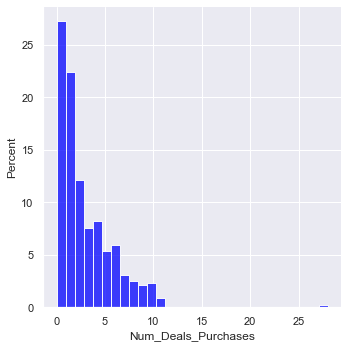

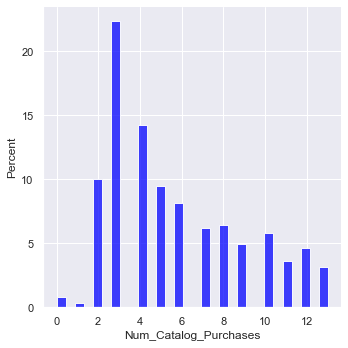

In [21]:
# Plot the histograms for the Mnt_... columns
purchases_col = ['Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases'] 
for col in purchases_col:
    sns.displot(numerical_data[col], bins=30, color='blue', stat='percent') # kde=True  

It looks like the distribution of 'Num_Store_Purchases' is the closest to a normal distribution in these columns. The other distributions are positively asymetric.

#### Num_Web_Visits Histogram

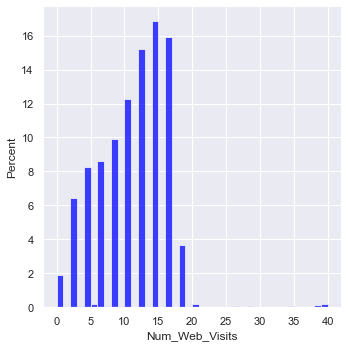

In [22]:
sns.displot(numerical_data['Num_Web_Visits'], bins=40, color='blue', stat='percent') # kde=True  

It seems like the distribution of this column is asymetric, with very few outliers in the positive side. Although, the distribution is negatively asymetric. It seems like it is an extreme value distribution. 

### Skewness and kurtosis

In [23]:
# Summarizing skewness and kurtosis metrics for each column in raw data frame
skew = numerical_data.skew(axis=0).reset_index()
skew = skew.rename(columns={0: "skewness"})
kurt = numerical_data.kurtosis(axis=0).reset_index()
kurt = kurt.rename(columns={0: "kurtosis"})


pd.merge(kurt,skew)


,index,kurtosis,skewness
0,Year_Birth,0.717887,-0.352130
1,Income,177.615223,7.916831
2,Num_of_kids,-0.854244,0.584131
3,Num_of_Teen,-0.987755,0.412991
4,Recency,-1.217166,-0.012308
5,Mnt_Fruits,0.590196,1.182911
6,Mnt_Meat,4.274347,2.149518
7,Mnt_sweet,5.710147,2.109214
8,Mnt_Wines,3.484059,1.988343
9,Mnt_Gold_Products,4.876565,2.218833


We saw in the distribution plots that 'Income' and 'Num_Store_Purchases' are normal distributions with a few outliers in the positive side. These outliers affect the mean and increase it. In the statistical analysis, we also saw that the mean in these column is higher than the median. Therefore, confirming our thought, the skewwness of these two column is higher than the other columns, The skewness for the 'Income' and 'Num_Store_Purchases' columns is 7.9 and 2.5, respectively. The skewness for the complain column is very high but the column is a categorical one, so there is no actual distribution for the values.
# Let's add something about kurtosis ABOVE.

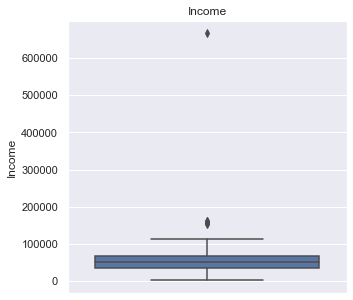

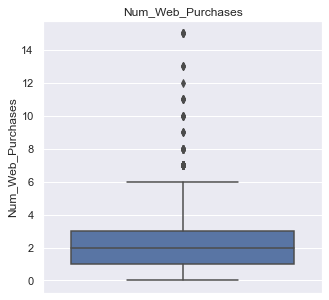

In [24]:
# Boxplot attributes with high skewness (chose skewness greater than 2.5)
high_skew = ['Income', 'Num_Web_Purchases']
for attribute in high_skew:
    sns.boxplot(y=attribute, data=numerical_data).set_title(attribute)
    plt.show()


## Nominal data

In [25]:
nominal_data.describe()

,Education,Status
count,1680,1680
unique,6,7
top,Graduation,Married
freq,830,653


In [26]:
nominal_data['Education'].value_counts()

Graduation    830
PhD           366
Master        282
2n Cycle      147
Basic          47
NA              8
Name: Education, dtype: int64

In [27]:
nominal_data['Status'].value_counts()

Married     653
Together    424
Single      356
Divorced    159
Widow        52
NA           34
Alone         2
Name: Status, dtype: int64

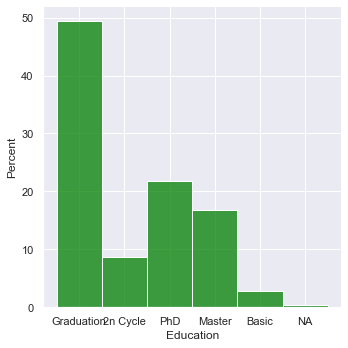

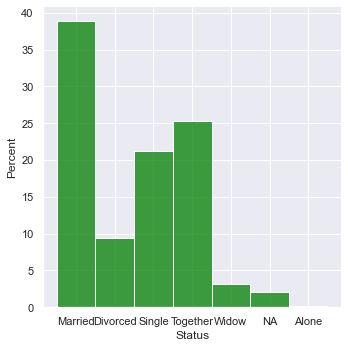

In [28]:
# Plot the histograms for the nominal data
for col in nominal_col:
    sns.displot(nominal_data[col], color='green', stat='percent') # kde=True    

In the 'Education' column, there are only 8 missing values out of 1680. The most frequent value is Graduation with almost 50% of the entries. 
In the 'Status' column, there are 34 missing values out of 1680. The most frequent value is Married with almost 40% of the entries.

## Target attributes

In [29]:
# Checking for NA values
for t in target_col:
    print("Values count for ", t)
    print(target[t].value_counts())
    print('****************************************')

Values count for  Response_Campaign_1
0.0    1535
1.0     127
NA       18
Name: Response_Campaign_1, dtype: int64
****************************************
Values count for  Response_Campaign_2
0.0    1553
1.0     120
NA        7
Name: Response_Campaign_2, dtype: int64
****************************************
Values count for  Response_Campaign_3
0.0    1552
1.0     121
NA        7
Name: Response_Campaign_3, dtype: int64
****************************************
Values count for  Response_Campaign_4
0.0    1564
1.0     109
NA        7
Name: Response_Campaign_4, dtype: int64
****************************************
Values count for  Response_Campaign_5
0.0    1650
1.0      23
NA        7
Name: Response_Campaign_5, dtype: int64
****************************************
Values count for  Response
0    1431
1     249
Name: Response, dtype: int64
****************************************


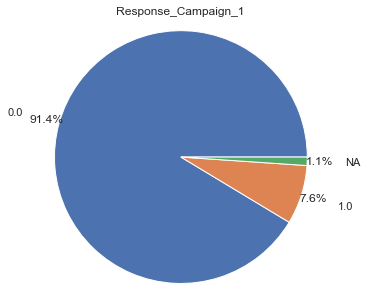

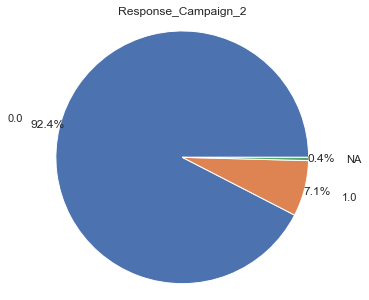

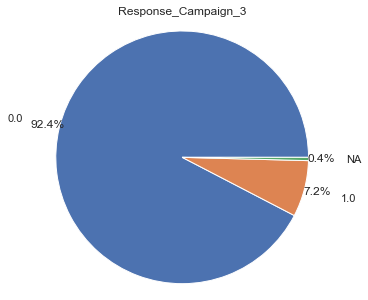

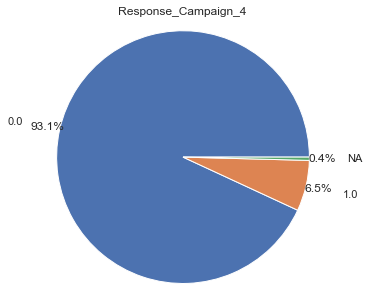

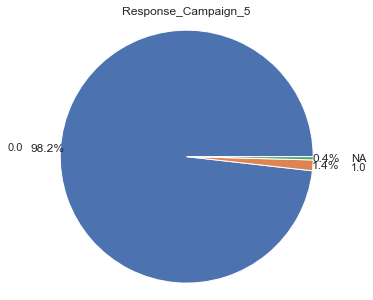

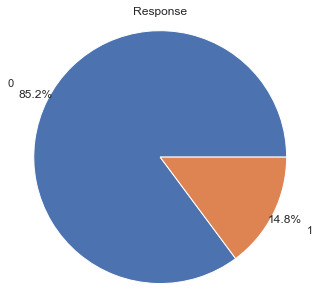

In [30]:
for t in target_col:
    fig1, ax1 = plt.subplots()
    ax1.pie(target[t].value_counts(), labels=target[t].unique(), autopct='%1.1f%%', startangle=0, pctdistance=1.1, labeldistance=1.3)
    ax1.axis('equal') 
    ax1.set_title(t)
    plt.show()

In general, the response for the first four campaigns was around 7%, while the response to the fifth campaign was only 1.4%. However, the response to the last campaign doubled and reached 14.8%.


# Correlations between attributes

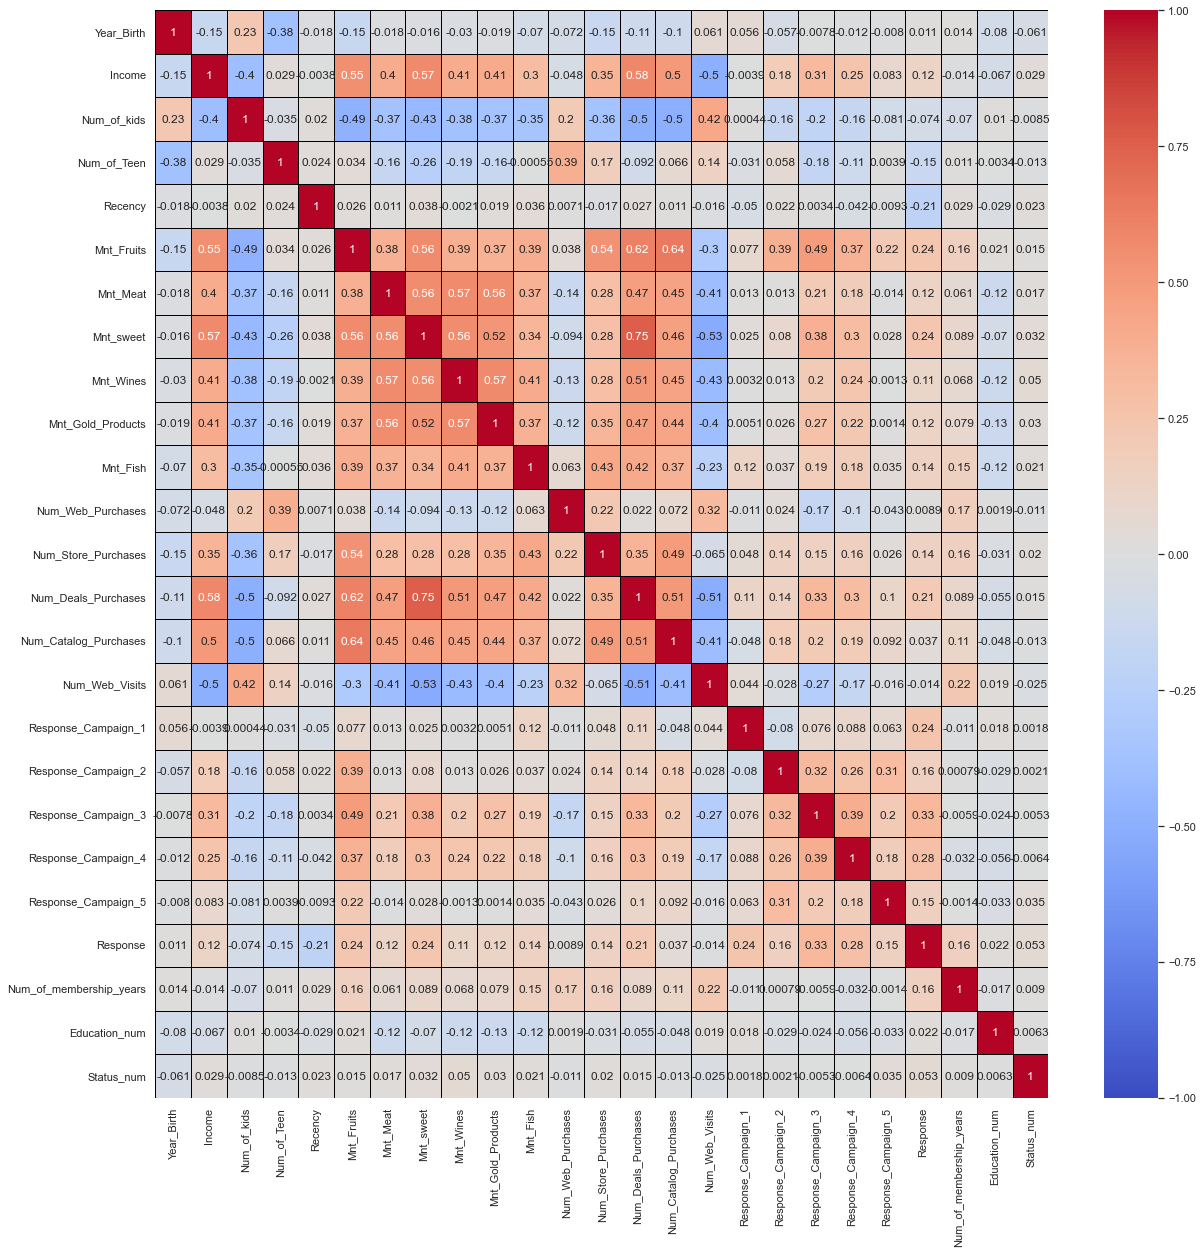

In [31]:
#plotting all to all columns scatter plot
#pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(40, 40), diagonal="kde")
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.5, linecolor='black')


If we look at the correlation matrix we can see many insights about the relationships between the attributes.
First, we would explore the correlation between the predictor attributes below.
1. We can see a general positive correlation between the attributes of Mnt_... and Num_..._Purchases (except Num_Web_Purchases).
2. We can see a negative correlation between Mnt_... attributes and Num_Web_Visits/Num_Web_Purchases.
3. There is also a general positive correlation between the Mnt_... attributes.
4. There is a negative correlation between Num_of_kids and Income. 
5. There is a negative correlation between Year_Birth and Num_of_Teen.
6. There is a positive correlation between Year_Birth and Num_of_kids.
7. Income has a positive correlation with Mnt_... attributes and Num_..._Purchases attributes (except Num_Web_Purchases).
8. Income has a negative correlation with Num_Web_Visits.
9. Num_..._Purchases attributes have a positive correlation between them (except Num_Web_Purchases, which has very low correlation with the other attributes in this group).
10. Num_of_kids has a negative correlation with Mnt_... attributes and Num_..._Purchases attributes (except Num_Web_Purchases).
11. Num_of_kids has a positive correlation with Num_Web_Purchases and Num_Web_Visits.
12. Num_Web_Visits has a negative correlation with Num_Deal/Catalog_Purchases.
13. Num_Web_Visits has a positive correlation with Num_of_membership_years.
14. Num_of_Teen has a positive correlation with Num_Web_Purchases.
** We can already see that Income and Num_of_kids have opposite relationships with different attributes. If Income has a positive correlation, Num_of_kids has a negative one. **


Now, we would explore the relationships between the predictor attributes and the reponse attributes.
1. Income has a positive correlation with Response_Campiagn_2/3/4 and Response.
2. Num_of_kid has a negative correlation with Response_Campiagn_2/3/4.
3. Num_of_Teen has a negative correlation with Response_Campiagn_3/4 and Response.
4. Mnt_... attributes have a positive correlation with Response_Campaign_3/4 and Response.
5. Mnt_Fruits has the strongest correlation with the Response attributes (Response_Campaign_2/3/4/5 and Response).
6. Num_Web_Purchases and Num_Web_Visits have a negative correlation with Response_Campaign_3/4 and Response
7. Num_Store/Deals/Catalog_Purchases have a positive correlation with Response_Campaign_2/3/4
8. Recency has a negative correlation with Response.
9. Num_of_membership_years has a positive correlation with Response.
10. Response_Campaign_2/3/4/5 have a general positive correlation with each other.
11. Response has a positive correlation with Response_Campaign_.. (all of them).


# Visualization of the insights

## Continuous attributes

#### Income and Responses

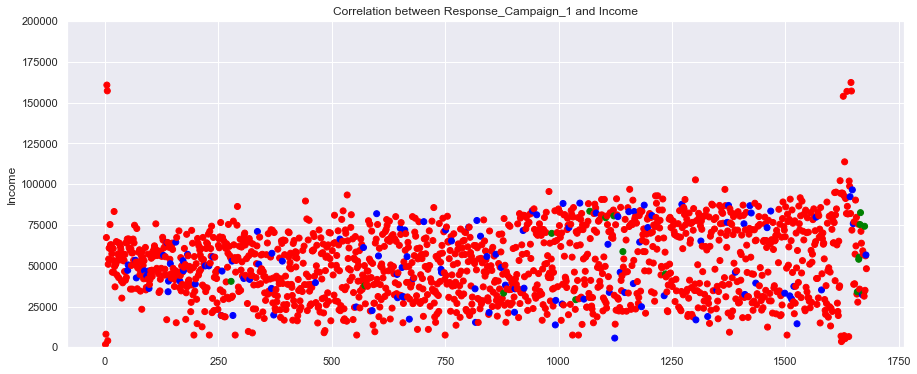

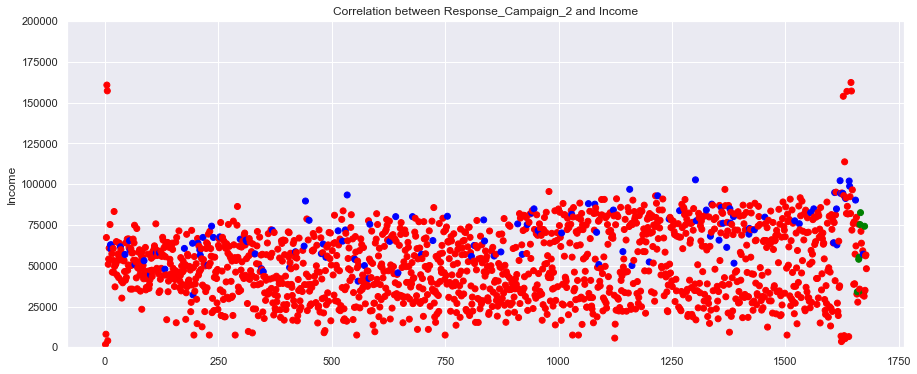

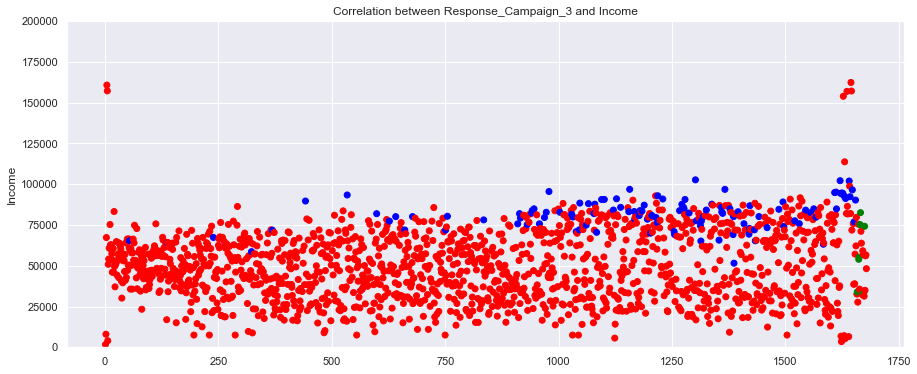

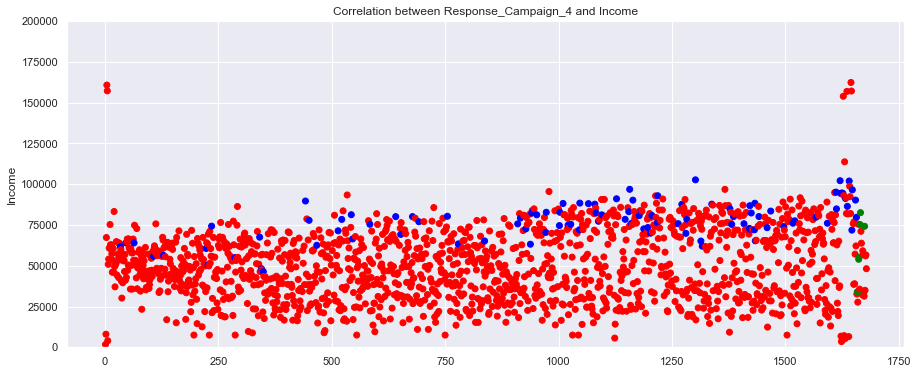

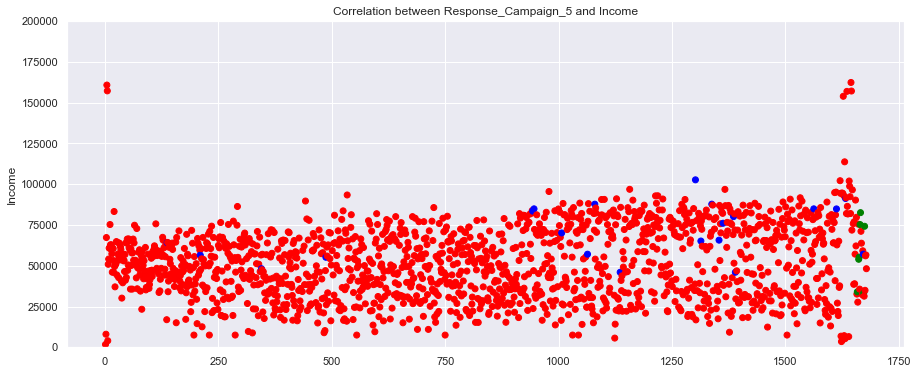

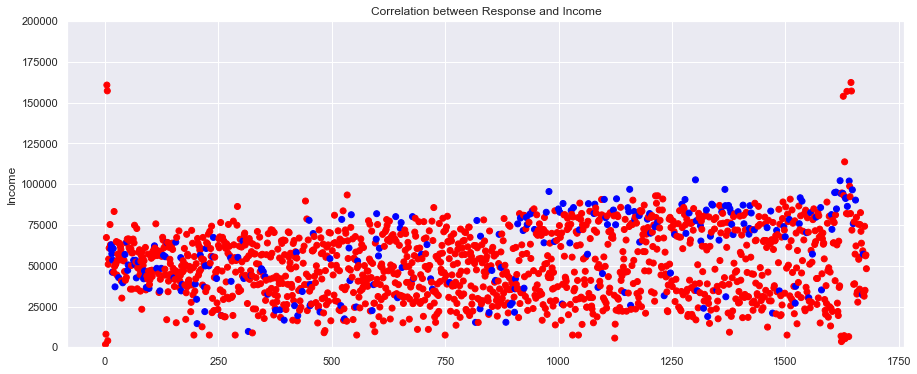

In [32]:
# Scatter plots
colordict = {0: 'red', 1: 'blue'}
for t in target_col:
    plt.figure(figsize=(15, 6))
    c_input = df[t].map(colordict).fillna('green')
    plt.scatter(df.index, df['Income'], c = c_input)
    plt.ylabel('Income')
    plt.ylim(0, 200000)
    plt.title('Correlation between ' + t + ' and Income')
    plt.show()

The relationship between the responses and Income is seen in the scatter plots above. There isn't a strong correlation betwen Income and Response_Campaign_1. In Response_Campaign_2 and 4, it seems that people with income over 50,000 responded. In Response_Campaign_3, it seems that people with income over 75,000 responded. In Response_Campaign_5, most people didn't respond at all so we can't see a clear relationship. In Response, there seems to be a slight higher concentration of responses with people with income higher than 50,000.

#### Mnt_... and responses

All Mnt_... attributes have similar correlations to the responses attributes. Because of that, we would plot the relationships only between Mnt_Fruits and the responses. 

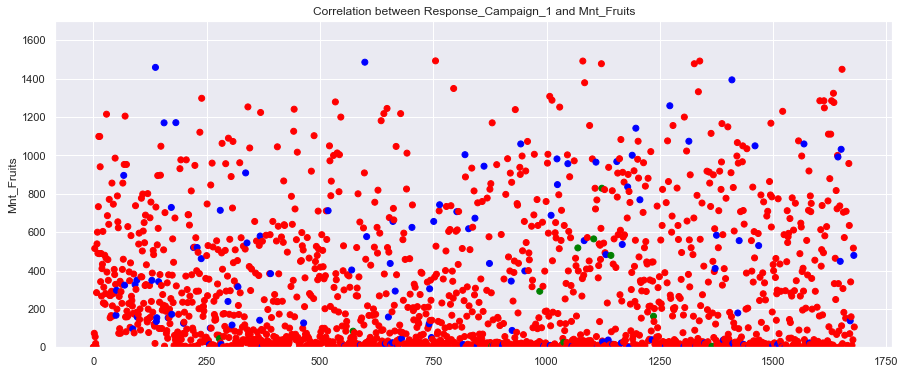

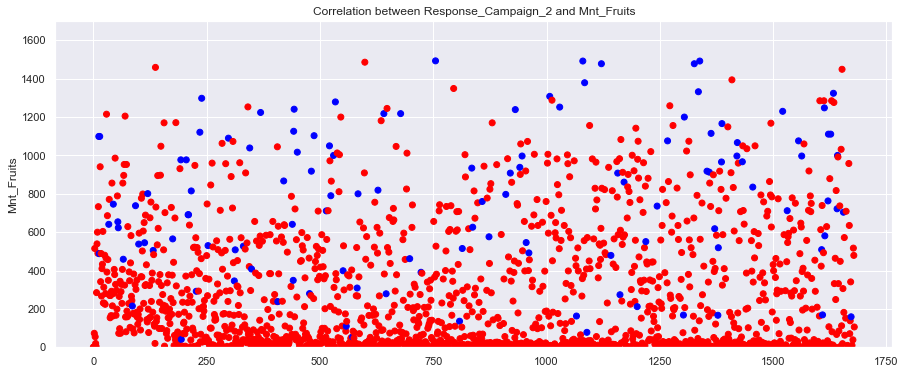

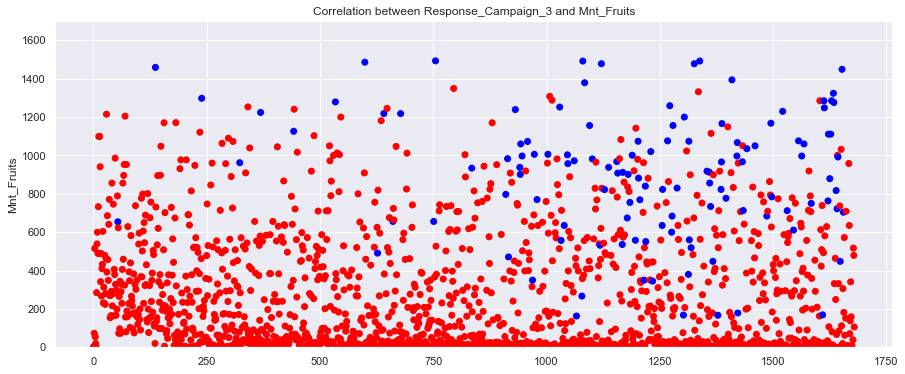

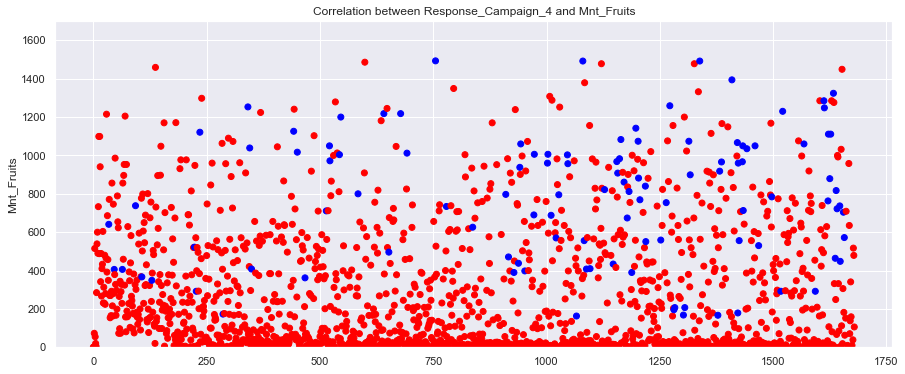

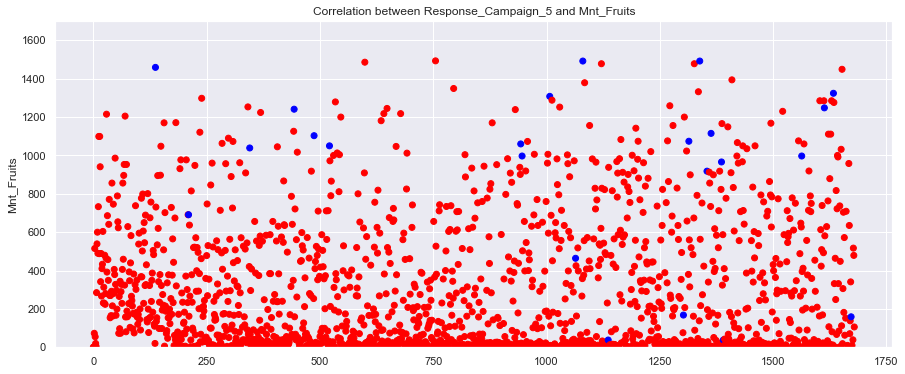

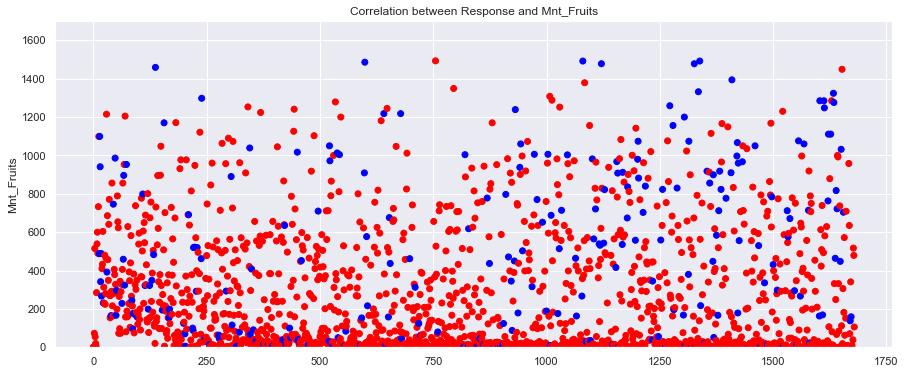

In [33]:
# Scatter plots
colordict = {0: 'red', 1: 'blue'}
for t in target_col:
    plt.figure(figsize=(15, 6))
    c_input = df[t].map(colordict).fillna('green')
    plt.scatter(df.index, df['Mnt_Fruits'], c = c_input)
    plt.ylabel('Mnt_Fruits')
    plt.ylim(0, 1700)
    plt.title('Correlation between ' + t + ' and Mnt_Fruits')
    plt.show()

We can see the correlation in the scatter plot of Mnt_Fruits and Response_Campaign_2/3/4. In these plots, most costumers who responded bought more than 200 fruits.

#### Num_Web_Purchases and responses

<Figure size 1080x432 with 0 Axes>

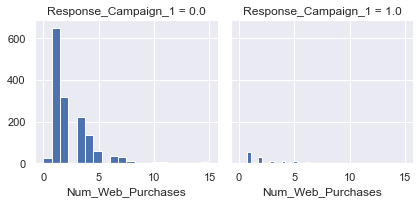

<Figure size 1080x432 with 0 Axes>

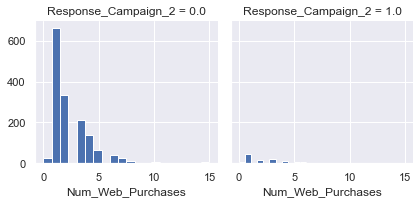

<Figure size 1080x432 with 0 Axes>

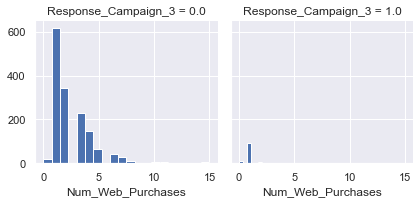

<Figure size 1080x432 with 0 Axes>

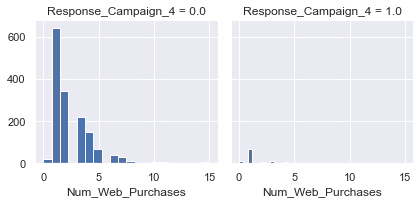

<Figure size 1080x432 with 0 Axes>

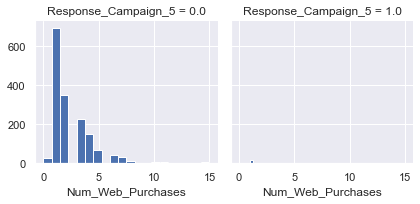

<Figure size 1080x432 with 0 Axes>

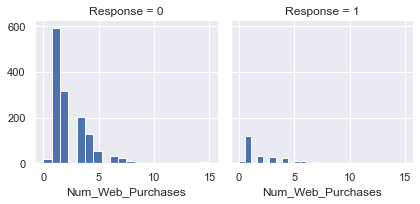

In [34]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.FacetGrid(df, col=t)
    g.map(plt.hist, 'Num_Web_Purchases', bins = 20)
    plt.show()

#### Num_Web_Visits and responses

<Figure size 1080x432 with 0 Axes>

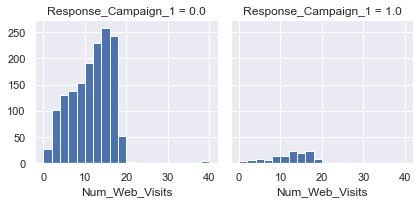

<Figure size 1080x432 with 0 Axes>

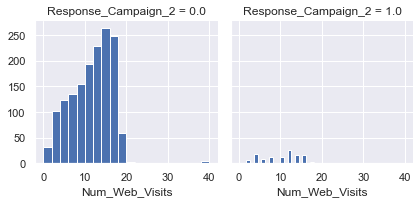

<Figure size 1080x432 with 0 Axes>

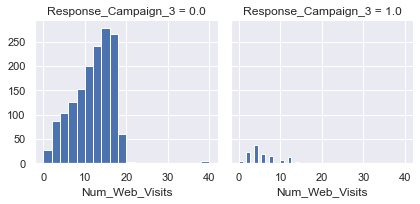

<Figure size 1080x432 with 0 Axes>

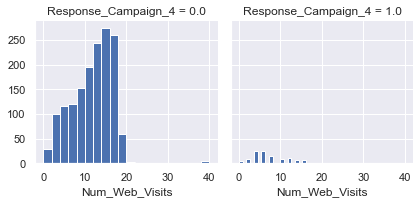

<Figure size 1080x432 with 0 Axes>

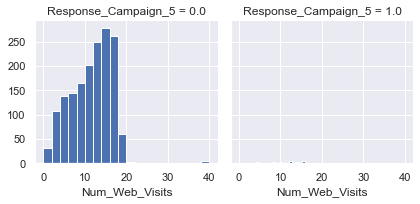

<Figure size 1080x432 with 0 Axes>

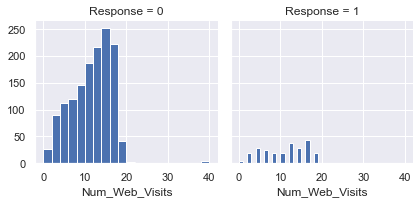

In [35]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.FacetGrid(df, col=t)
    g.map(plt.hist, 'Num_Web_Visits', bins=20)
    plt.show()

#### Num_Deals_Purchases and responses

<Figure size 1080x432 with 0 Axes>

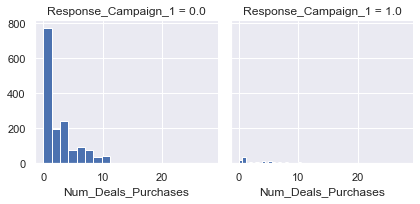

<Figure size 1080x432 with 0 Axes>

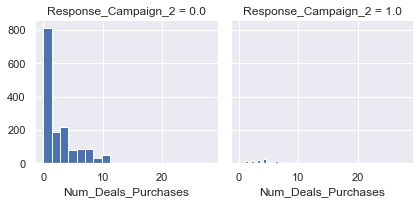

<Figure size 1080x432 with 0 Axes>

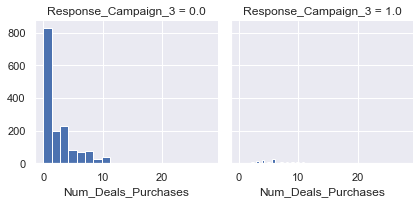

<Figure size 1080x432 with 0 Axes>

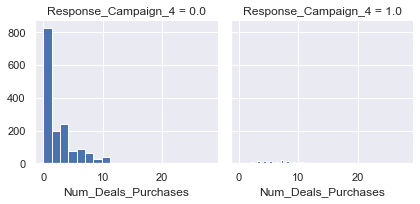

<Figure size 1080x432 with 0 Axes>

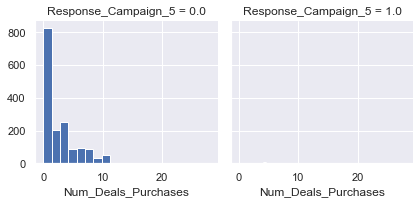

<Figure size 1080x432 with 0 Axes>

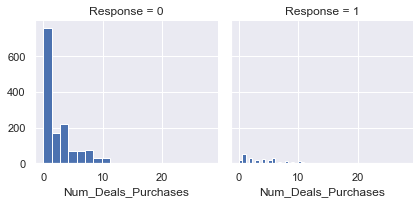

In [36]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.FacetGrid(df, col=t)
    g.map(plt.hist, 'Num_Deals_Purchases', bins = 20)
    plt.show()

#### Recency and response

<Figure size 1080x432 with 0 Axes>

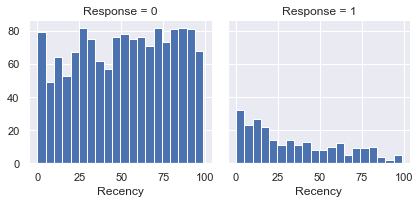

In [37]:
plt.figure(figsize=(15, 6))
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Recency', bins=20)
plt.show()

## Categorical attributes

#### Num_of_kids and responses

<Figure size 1080x432 with 0 Axes>

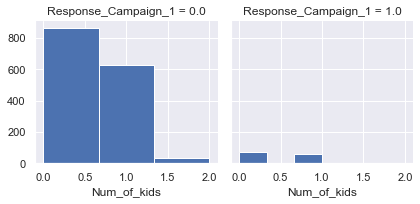

<Figure size 1080x432 with 0 Axes>

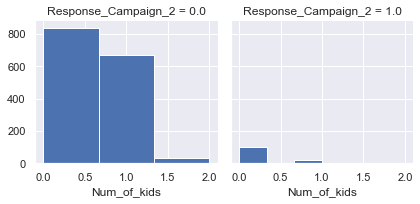

<Figure size 1080x432 with 0 Axes>

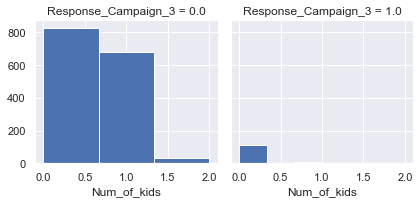

<Figure size 1080x432 with 0 Axes>

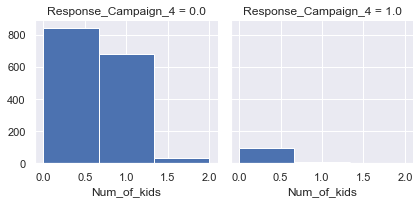

<Figure size 1080x432 with 0 Axes>

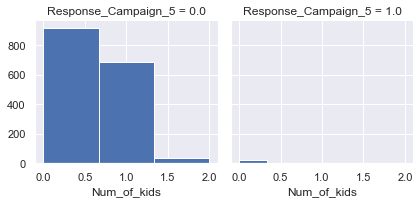

<Figure size 1080x432 with 0 Axes>

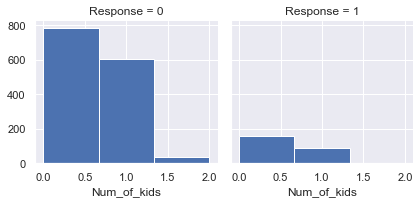

In [38]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.FacetGrid(df, col=t)
    g.map(plt.hist, 'Num_of_kids', bins = 3)
    plt.show()

The negative correlartion between Num_of_kids and responses is seen in the bar graphs. It seems that costumers with 2 kids never respond. Also, costumers with 0 kids respond more than costumers with 1 kid.

#### Num_of_Teen and responses

<Figure size 1080x432 with 0 Axes>

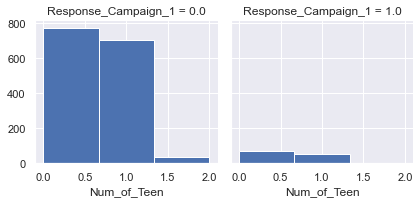

<Figure size 1080x432 with 0 Axes>

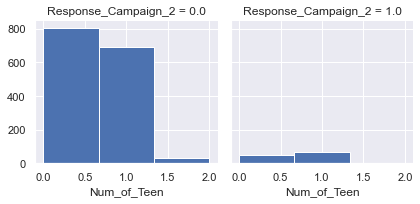

<Figure size 1080x432 with 0 Axes>

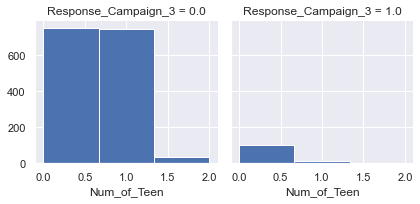

<Figure size 1080x432 with 0 Axes>

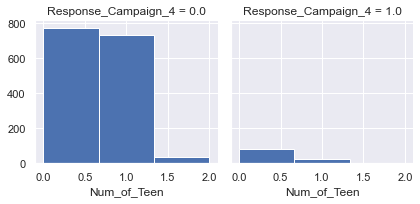

<Figure size 1080x432 with 0 Axes>

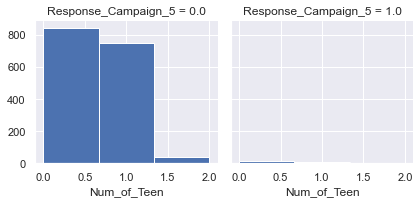

<Figure size 1080x432 with 0 Axes>

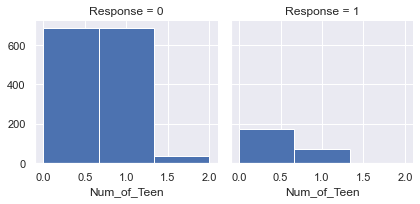

In [39]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.FacetGrid(df, col=t)
    g.map(plt.hist, 'Num_of_Teen', bins = 3)
    plt.show()

The negative correlartion between Num_of_Teen and responses is seen in the bar graphs. It seems that costumers with 2 teens never respond. Also, costumers with 0 teens respond more than costumers with 1 teen. With the exception of Response_Campaign_2, in which costumers with 1 teen respond more than costumers with 0 teens.

#### Num_of_membership_years and Response

<Figure size 1080x432 with 0 Axes>

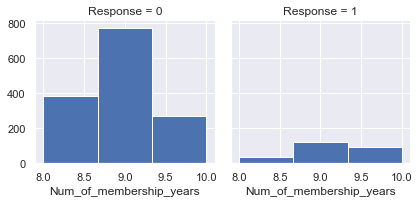

In [40]:
plt.figure(figsize=(15, 6))
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Num_of_membership_years', bins=3)
plt.show()

#### Education and Response

<Figure size 1080x432 with 0 Axes>

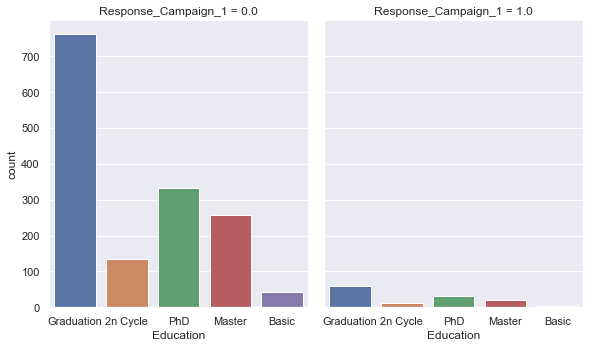

<Figure size 1080x432 with 0 Axes>

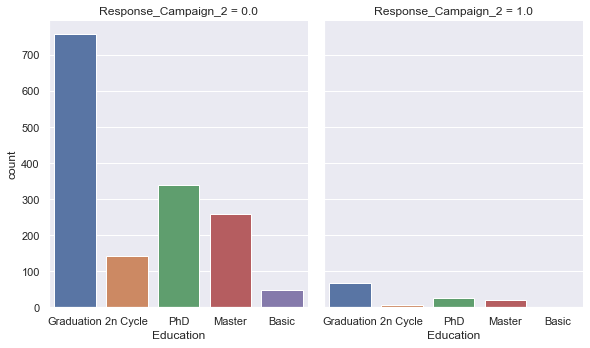

<Figure size 1080x432 with 0 Axes>

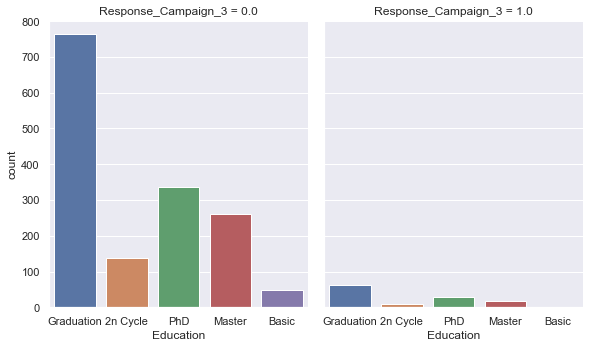

<Figure size 1080x432 with 0 Axes>

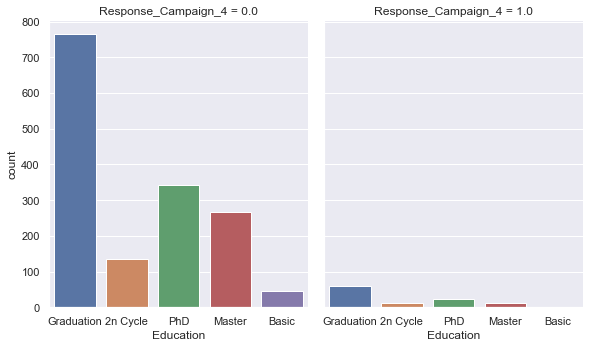

<Figure size 1080x432 with 0 Axes>

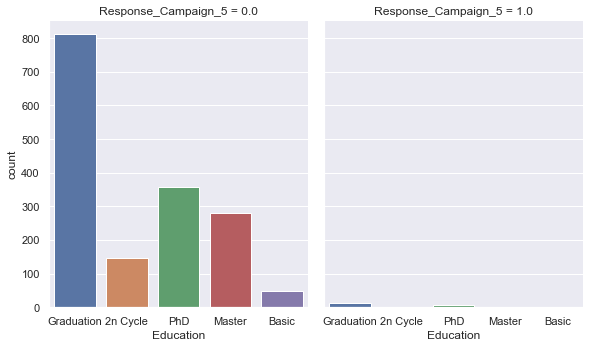

<Figure size 1080x432 with 0 Axes>

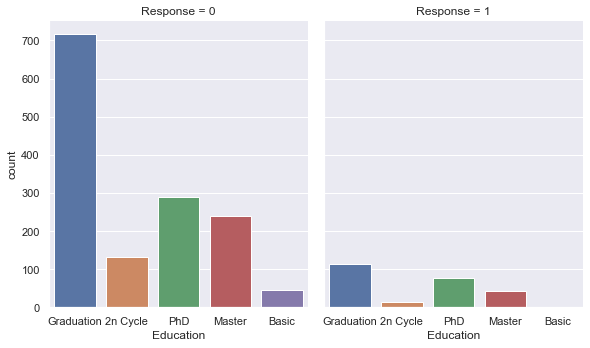

In [41]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.catplot(x="Education", col=t, col_wrap=4, data=df, kind="count", height=5, aspect=.8) 
    plt.show()

#### Status and Response

<Figure size 1080x432 with 0 Axes>

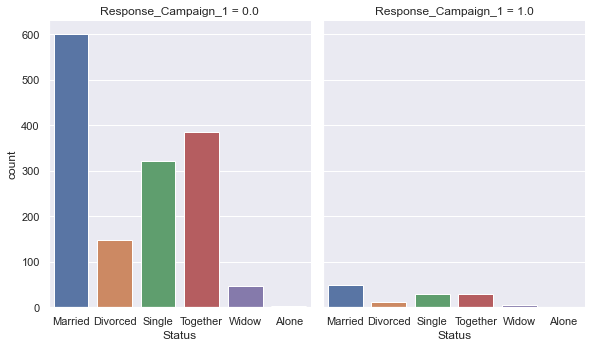

<Figure size 1080x432 with 0 Axes>

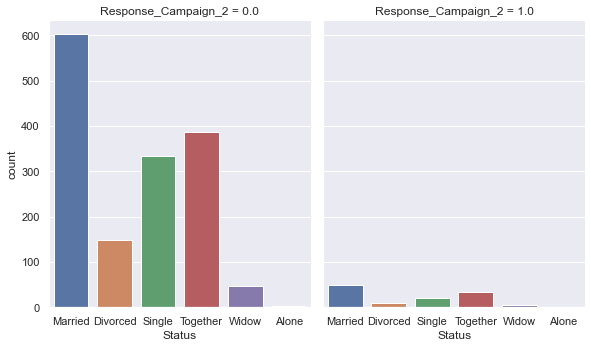

<Figure size 1080x432 with 0 Axes>

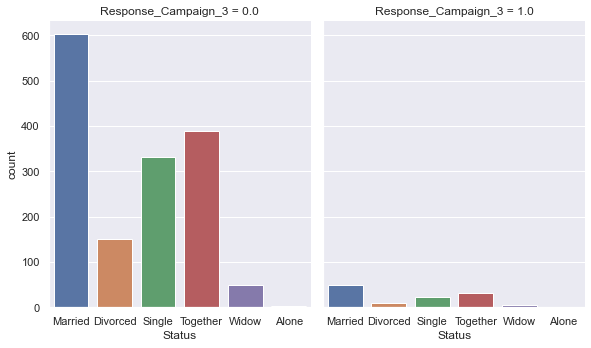

<Figure size 1080x432 with 0 Axes>

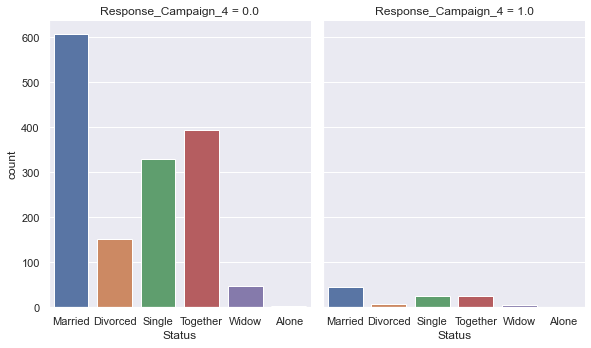

<Figure size 1080x432 with 0 Axes>

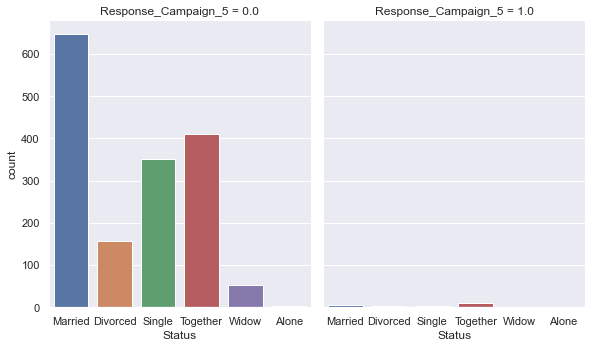

<Figure size 1080x432 with 0 Axes>

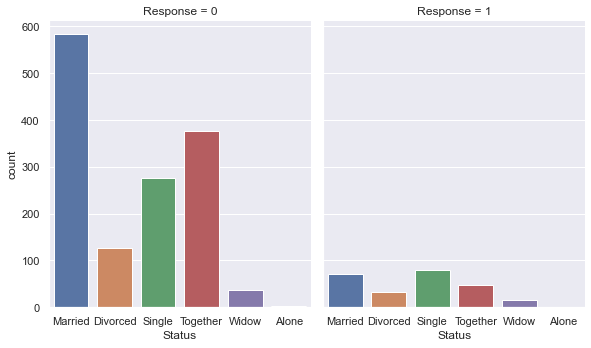

In [42]:
# Bar-graphs
for t in target_col:
    plt.figure(figsize=(15, 6))
    g = sns.catplot(x="Status", col=t, col_wrap=4, data=df, kind="count", height=5, aspect=.8) 
    plt.show()

In [43]:
#sns.boxplot(y="Age", x="Sex", hue= "Survived", data=df, palette="Set3")

# Plot the boxplot for the nominal data
for colT in target_col:
    for colP in nominal_col:
        print()
        #sns.boxplot(data=df, x=colP, hue=colT, multiple = "dodge", stat='percent', palette = 'tab10')

# Data cleaning

## Missing values

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               1651 non-null   float64
 1   Education                1672 non-null   object 
 2   Status                   1646 non-null   object 
 3   Income                   1609 non-null   float64
 4   Num_of_kids              1672 non-null   float64
 5   Num_of_Teen              1660 non-null   float64
 6   Recency                  1680 non-null   int64  
 7   Mnt_Fruits               1673 non-null   float64
 8   Mnt_Meat                 1673 non-null   float64
 9   Mnt_sweet                1659 non-null   float64
 10  Mnt_Wines                1673 non-null   float64
 11  Mnt_Gold_Products        1673 non-null   float64
 12  Mnt_Fish                 1673 non-null   float64
 13  Num_Web_Purchases        1651 non-null   float64
 14  Num_Store_Purchases     

In [45]:
null_data = df[df.isnull().sum(axis=1)>2]
null_data

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Num_of_membership_years,Education_num,Status_num
502,NaN,NaN,NaN,NaN,NaN,NaN,0,80.0,1.0,37.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0,10,-1,-1
509,NaN,NaN,NaN,NaN,NaN,NaN,12,357.0,35.0,271.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0,9,-1,-1
634,NaN,NaN,NaN,NaN,NaN,NaN,21,14.0,0.0,6.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0,8,-1,-1
936,NaN,NaN,NaN,NaN,NaN,NaN,51,741.0,68.0,689.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0,10,-1,-1
1151,NaN,NaN,NaN,NaN,NaN,NaN,70,12.0,4.0,19.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0,10,-1,-1
1464,NaN,NaN,NaN,NaN,NaN,NaN,6,9.0,1.0,3.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0,9,-1,-1
1502,NaN,NaN,NaN,NaN,NaN,NaN,80,21.0,8.0,20.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0,9,-1,-1
1639,NaN,NaN,NaN,NaN,NaN,NaN,25,817.0,183.0,797.0,...,4.0,0.0,0.0,1.0,1.0,0.0,1,10,-1,-1
1659,1950.0,Graduation,Together,34026.0,1.0,1.0,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,9,0,3
1662,1958.0,Graduation,Together,53977.0,0.0,1.0,21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,9,0,3


We have 15 rows in which there is a more than 2 missing values in each row. We can see that most rows have many missing values. The first eight rows are missing the information about the costumer like education, status, num of kids etc. The last 7 rows are missing the data about the costumer's shopping behavior. Therefore we choose to remove all these rows from the data completely.

In [46]:
clean_df = df.drop(df[df.apply(lambda x: x.count(), axis=1)<24].index)

### Birth_Year column

In [47]:
clean_df[clean_df['Year_Birth'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Num_of_membership_years,Education_num,Status_num
204,NaN,Graduation,Widow,66731.0,0.0,1.0,33,371.0,159.0,194.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4
211,NaN,2n Cycle,Widow,47682.0,0.0,1.0,80,162.0,61.0,83.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0,9,1,4
335,NaN,PhD,Widow,62187.0,0.0,1.0,38,512.0,0.0,83.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0,8,2,4
346,NaN,Master,Widow,47570.0,1.0,1.0,3,67.0,1.0,20.0,...,14.0,0.0,0.0,0.0,0.0,0.0,1,9,3,4
465,NaN,Graduation,Widow,27421.0,0.0,0.0,14,43.0,12.0,96.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4
484,NaN,Graduation,Widow,30372.0,1.0,1.0,33,15.0,0.0,12.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4
630,NaN,PhD,Widow,50520.0,0.0,1.0,25,112.0,0.0,6.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0,8,2,4
777,NaN,Master,Widow,51529.0,0.0,1.0,14,400.0,4.0,35.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0,9,3,4
838,NaN,Graduation,Widow,43638.0,0.0,1.0,37,63.0,10.0,83.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4
840,NaN,Graduation,Widow,53653.0,0.0,0.0,29,815.0,10.0,239.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4


We can see that all the rows that are missing a birth year have one thing in common. Their status is 'Widow' for all rows. We would use that information to complete the 'Year_Birth' column. It is fairly common to assume that the mean age of the windows is higher than the mean for all the data. We would calculate the distribution for the birth year of the widows and fill the missing values based on that distribution.

In [48]:
# Find the distribution of 'Year_Birth' only for rows that their 'Status' is widow.
widows_df = clean_df[clean_df['Status']=='Widow']
s = widows_df.Year_Birth.value_counts(normalize=True)
# Complete the data in the 'Year_Birth' column based on the distribution we found
clean_df.loc[clean_df.Year_Birth.isnull(), 'Year_Birth'] = np.random.choice(s.index, p=s.values, size=clean_df.Year_Birth.isnull().sum())

### Status column

Because status column doesn't correlate with any other attribute, we would not be filling the missing values in this column.

### Income column

Because the data in income column has a distribution close to normal, we would calculate its distribution and fill the missing values based on that distribution.

In [49]:
# Find the distribution of 'Income'
s = clean_df.Income.value_counts(normalize=True)
# Complete the data in the 'Income' column based on the distribution we found
clean_df.loc[clean_df.Income.isnull(), 'Income'] = np.random.choice(s.index, p=s.values, size=clean_df.Income.isnull().sum())

### Num_of_Teen column

This column has a very strong correlation with Num_Web_Purchases. For each row we are filling, we would get all the rows that have the same value in the 'Num_Web_Purchases' column. Based on the most frequent value in 'Num_of_Teen' in these row we would fill the missing value.

In [50]:
# Fill the missing values in 'Num_of_Teen' based on the values in 'Num_Web_Purchases'
for index in clean_df[clean_df['Num_of_Teen'].isnull()].index:
    val = clean_df.loc[index, 'Num_Web_Purchases'] # Find value of Num_Web_Purchases in this row
    fill_value = clean_df.loc[clean_df['Num_Web_Purchases'] == val, 'Num_of_Teen'].mode() # Get the most frequent value in Num_of_Teen col
    clean_df.loc[index, 'Num_of_Teen'] = fill_value[0]

### Mnt_sweet column

This column has a very strong correlation with Num_Deals_Purchases. For each row we are filling, we would get all the rows that have the same value in the 'Num_Deals_Purchases' column. Based on the most frequent value in 'Mnt_sweet' in these row we would fill the missing value.

In [51]:
# Fill the missing values in 'Mnt_sweet' based on the values in 'Num_Deals_Purchases'
for index in clean_df[clean_df['Mnt_sweet'].isnull()].index:
    val = clean_df.loc[index, 'Num_Deals_Purchases'] # Find value of Num_Deals_Purchases in this row
    fill_value = clean_df.loc[clean_df['Num_Deals_Purchases'] == val, 'Mnt_sweet'].mode() # Get the most frequent value in Num_of_Teen col
    clean_df.loc[index, 'Mnt_sweet'] = fill_value[0]

### Num_Web_Purchases column

This column correlates strongly with the 'Num_of_Teen' column. For that reason, we would split the 'Num_Web_Purchases' column based on the value of 'Num_of_Teen' in the rows. We would calculate the distribution of the splitted groups of 'Num_Web_Purchases', and fill the median in the missing values.

In [52]:
medians = []
for num in [0.0, 1.0, 2.0]:
    med = clean_df.loc[clean_df['Num_of_Teen'] == num, 'Num_Web_Purchases'].median()
    medians.append(med)
    
for index in clean_df[clean_df['Num_Web_Purchases'].isnull()].index:
    num = clean_df.loc[index, 'Num_of_Teen'] # Find value of Num_of_Teen in this row
    clean_df.loc[index, 'Num_Web_Purchases'] = medians[int(num)]

### Response_Campaign_1 column

The strongest correlation this column has is 0.24 with the 'Response' column. For that reason, we would fill in the missing values with the values from the Response column.

In [53]:
clean_df[clean_df['Response_Campaign_1'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Num_of_membership_years,Education_num,Status_num
278,1952.0,Master,Together,40442.0,1.0,1.0,52,45.0,12.0,52.0,...,14.0,NaN,0.0,0.0,0.0,0.0,1,10,3,3
573,1946.0,Graduation,Together,37760.0,0.0,0.0,20,84.0,5.0,38.0,...,14.0,NaN,0.0,0.0,0.0,0.0,0,10,0,3
879,1975.0,Graduation,Single,33249.0,1.0,0.0,11,6.0,10.0,21.0,...,12.0,NaN,0.0,0.0,0.0,0.0,0,9,0,2
985,1965.0,Master,Single,69882.0,0.0,0.0,94,292.0,127.0,635.0,...,2.0,NaN,0.0,0.0,0.0,0.0,0,9,3,2
1038,1968.0,PhD,Married,29187.0,1.0,0.0,43,26.0,0.0,6.0,...,16.0,NaN,0.0,0.0,0.0,0.0,0,9,2,0
1069,1972.0,PhD,Together,83443.0,0.0,0.0,89,518.0,42.0,742.0,...,4.0,NaN,0.0,0.0,0.0,0.0,0,9,2,3
1104,1956.0,Graduation,Married,79456.0,0.0,0.0,12,565.0,42.0,548.0,...,6.0,NaN,0.0,0.0,0.0,0.0,1,10,0,0
1122,1971.0,Master,Together,80573.0,0.0,0.0,85,829.0,138.0,430.0,...,4.0,NaN,0.0,0.0,0.0,0.0,0,10,3,3
1142,1981.0,Graduation,Single,58684.0,0.0,0.0,71,479.0,35.0,179.0,...,4.0,NaN,1.0,0.0,0.0,0.0,0,8,0,2
1236,1960.0,Master,Widow,45006.0,0.0,0.0,90,162.0,25.0,53.0,...,6.0,NaN,0.0,0.0,0.0,0.0,0,9,3,4


In [54]:
# Fill the missing values in 'Response_Campaign_1' based on the values in 'Response'
p = sum(clean_df['Response_Campaign_1']==clean_df['Response'])/len(clean_df) # probability that values are equal
for index in clean_df[clean_df['Response_Campaign_1'].isnull()].index:
    r = np.random.uniform(low = 0.0, high = 1.0)
    clean_df.loc[index, 'Response_Campaign_1'] = 0.0
    if r > p:
        clean_df.loc[index, 'Response_Campaign_1'] = clean_df.loc[index, 'Response']
    elif clean_df.loc[index, 'Response'] == 0.0:
        clean_df.loc[index, 'Response_Campaign_1'] = 1.0

In [55]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               1665 non-null   float64
 1   Education                1665 non-null   object 
 2   Status                   1639 non-null   object 
 3   Income                   1665 non-null   float64
 4   Num_of_kids              1665 non-null   float64
 5   Num_of_Teen              1665 non-null   float64
 6   Recency                  1665 non-null   int64  
 7   Mnt_Fruits               1665 non-null   float64
 8   Mnt_Meat                 1665 non-null   float64
 9   Mnt_sweet                1665 non-null   float64
 10  Mnt_Wines                1665 non-null   float64
 11  Mnt_Gold_Products        1665 non-null   float64
 12  Mnt_Fish                 1665 non-null   float64
 13  Num_Web_Purchases        1665 non-null   float64
 14  Num_Store_Purchases     

## Outliers

### Year_Birth column

This column has a few outliers that we saw in the statistical analysis. Because this column has a noral distribution, we would remove the observations that are more than 3 std's from the mean.

In [56]:
data_mean, data_std = np.mean(clean_df['Year_Birth']), np.std(clean_df['Year_Birth'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
indices = clean_df.loc[(clean_df['Year_Birth'] > upper) | (clean_df['Year_Birth'] < lower)].index
clean_df = clean_df.drop(indices)

### Income column

This column has a few outliers that we saw in the statistical analysis. Because this column has a noral distribution, we would remove the observations that are more than 3 std's from the mean.

In [57]:
data_mean, data_std = np.mean(clean_df['Income']), np.std(clean_df['Income'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
indices = clean_df.loc[(clean_df['Income'] > upper) | (clean_df['Income'] < lower)].index
clean_df = clean_df.drop(indices)

### Mnt_... columns

In [58]:
percent_all = sum(clean_df['Response'])/len(clean_df)
percent_all3 = sum(clean_df['Response_Campaign_3'])/len(clean_df)

In [59]:
col_mnt = [word for word in clean_df.columns if 'Mnt' in word]
for col in col_mnt:
    outliers = clean_df.loc[(clean_df[col] > clean_df[col].quantile(0.99)),'Response']
    percent_outliers = sum(outliers)/len(outliers)
    outliers3 = clean_df.loc[(clean_df[col] > clean_df[col].quantile(0.99)),'Response_Campaign_3']
    percent_outliers3 = sum(outliers3)/len(outliers3)
    print("Comparison for", col)
    print("Percent of responses in total for 'Response'", percent_all)
    print("Percent of responses in the 99th percentile", percent_outliers)
    print("Percent of responses in total for 'Response_Campaign_3'", percent_all3)
    print("Percent of responses in the 99th percentile", percent_outliers3)
    print("################################################################################")

Comparison for Mnt_Fruits
Percent of responses in total for 'Response' 0.1497584541062802
Percent of responses in the 99th percentile 0.625
Percent of responses in total for 'Response_Campaign_3' 0.07185990338164251
Percent of responses in the 99th percentile 0.75
################################################################################
Comparison for Mnt_Meat
Percent of responses in total for 'Response' 0.1497584541062802
Percent of responses in the 99th percentile 0.1875
Percent of responses in total for 'Response_Campaign_3' 0.07185990338164251
Percent of responses in the 99th percentile 0.0625
################################################################################
Comparison for Mnt_sweet
Percent of responses in total for 'Response' 0.1497584541062802
Percent of responses in the 99th percentile 0.47058823529411764
Percent of responses in total for 'Response_Campaign_3' 0.07185990338164251
Percent of responses in the 99th percentile 0.35294117647058826
##############

We conducted a comparison of the response rate in total and the response rate for the outliers. Our conclusion is that the response rate in that group is much higher than the total response rate. Removing these outliers might decrease the correlation between the responses and the Mnt_... columns. Therefore, we would keep all the observations in these columns.

## Inconsistent data

In [60]:
for col in clean_df.columns:
    print(col)
    df_temp = clean_df.fillna('NA')
    print(sorted(df_temp[col].unique()))
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")

Year_Birth
[1941.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Education
['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Status
['Alone', 'Divorced', 'Married', 'NA', 'Single', 'Together', 'Widow']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Income
[1730.0, 3502.0, 4023.0, 4428.0, 5305.0, 5648.0, 6560.0, 6835.0, 7144.0, 7500.0, 8028.0, 8820.0, 8940.0, 9255.0, 9548.0, 9722.0, 10245.0, 10979.0, 12393.0, 12571.0, 13084.0, 13533.0, 13624.0, 13724.0, 14045.0, 14188.0, 14421.0, 14515.0, 14661.0, 14906.0, 14918.0, 15033.0, 15038.0, 15056.0, 15253.0, 15

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 76.0, 77.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 96.0, 97.0, 98.0, 99.0, 100.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 111.0, 112.0, 114.0, 115.0, 117.0, 120.0, 122.0, 123.0, 124.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 137.0, 138.0, 140.0, 142.0, 143.0, 147.0, 148.0, 151.0, 153.0, 154.0, 155.0, 159.0, 160.0, 161.0, 162.0, 163.0, 166.0, 168.0, 169.0, 172.0, 174.0, 178.0, 183.0, 184.0, 185.0, 190.0, 193.0, 194.0, 199.0]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Mnt_sweet
[1.0, 2.0, 3.0, 4.0, 5.0

We checked for inconsistent data, but it seems like the data is indeed consistent. We don't see any discrepancies. Every column contains a signle data type and the range of the values matches the normal range. From this evaluation, we also decided to discretize the following attributes - Year_Birth, Income, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Gold_Products, Mnt_Fish.

## Smooth noisy data

In [61]:
# Smooth the 'Recency' column with moving average
smth_recency = []
for i in range(0, len(clean_df)+16, 16):
    m = clean_df.loc[i:i+15, 'Recency']
    smth_recency.extend(repeat(np.mean(m),len(m)))
clean_df['Recency'] = smth_recency

# Addition of new attributes

In [62]:
# Add a column of total number of children of costumer
clean_df["Num_of_children"] = clean_df["Num_of_kids"] + clean_df["Num_of_Teen"]

# Add a column of total amount of money spent overall
col_mnt = [word for word in clean_df.columns if 'Mnt' in word]
clean_df["Mnt_total"] = df.loc[:,col_mnt].sum(axis=1)

# Add a column of total number of purchases overall
col_pur = [word for word in clean_df.columns if 'Purchases' in word]
clean_df["Num_total_Purchases"] = df.loc[:,col_pur].sum(axis=1)

clean_df.head()

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Num_of_membership_years,Education_num,Status_num,Num_of_children,Mnt_total,Num_total_Purchases
0,1979.0,Graduation,Married,75693.0,1.0,0.0,44.857143,1.0,1.0,1725.0,...,0.0,0.0,0.0,0,9,0,0,1.0,1730.0,43.0
1,1971.0,Graduation,Divorced,1730.0,0.0,0.0,44.857143,1.0,1.0,3.0,...,0.0,0.0,0.0,0,8,0,1,0.0,8.0,15.0
2,1991.0,Graduation,Single,8028.0,0.0,0.0,44.857143,73.0,18.0,66.0,...,0.0,0.0,0.0,0,10,0,2,0.0,178.0,16.0
3,1967.0,2n Cycle,Together,67309.0,1.0,1.0,44.857143,515.0,47.0,181.0,...,0.0,0.0,0.0,0,9,1,3,2.0,1082.0,39.0
6,1963.0,PhD,Married,4023.0,1.0,1.0,44.857143,5.0,0.0,1.0,...,0.0,0.0,0.0,0,8,2,0,2.0,9.0,15.0


# Data transformation

In [63]:
# Get only the numerical and complete columns in the data
num_df = clean_df.drop(['Education', 'Status', 'Status_num'], axis=1)
num_df.head()

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Num_of_membership_years,Education_num,Num_of_children,Mnt_total,Num_total_Purchases
0,1979.0,75693.0,1.0,0.0,44.857143,1.0,1.0,1725.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,9,0,1.0,1730.0,43.0
1,1971.0,1730.0,0.0,0.0,44.857143,1.0,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,8,0,0.0,8.0,15.0
2,1991.0,8028.0,0.0,0.0,44.857143,73.0,18.0,66.0,7.0,12.0,...,0.0,0.0,0.0,0.0,0,10,0,0.0,178.0,16.0
3,1967.0,67309.0,1.0,1.0,44.857143,515.0,47.0,181.0,149.0,95.0,...,0.0,0.0,0.0,0.0,0,9,1,2.0,1082.0,39.0
6,1963.0,4023.0,1.0,1.0,44.857143,5.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,8,2,2.0,9.0,15.0


### Discretization

We perform discretization on multiple attributes. These columns contain many many unique values, because these columns have continuous data. Therefore, we discretize the data in the columns to make it easier to work with. The columns 'Year_Birth' and 'Income' were splitted to 5 groups. While the Mnt_.. columns were splitted to 10 columns.

In [64]:
col_names = ['Year_Birth', 'Income']
for col in col_names:
    mn = num_df[col].min()
    mx = num_df[col].max()
    w = np.round((mx - mn)/4)
    for i in range(0,5):
        lower = mn + i*w - 1
        upper = lower + w
        new_name = col + '_bin'
        num_df.loc[(num_df[col] > lower) & (num_df[col] <= upper), new_name] = i

In [65]:
col_names = [word for word in clean_df.columns if 'Mnt' in word]
for col in col_names:
    mn = num_df[col].min()
    mx = num_df[col].max()
    w = np.round((mx - mn)/9)
    for i in range(0,10):
        lower = mn + i*w -1
        upper = lower + w
        new_name = col + '_bin'
        num_df.loc[(num_df[col] > lower) & (num_df[col] <= upper), new_name] = i

### Normalization

In [66]:
scaler = StandardScaler()
scaler.fit(num_df)

StandardScaler()

In [67]:
z_df = scaler.transform(num_df)
z_df = pd.DataFrame(z_df, columns = num_df.columns)
z_df.isnull().sum(axis=0)

Year_Birth                 0
Income                     0
Num_of_kids                0
Num_of_Teen                0
Recency                    0
Mnt_Fruits                 0
Mnt_Meat                   0
Mnt_sweet                  0
Mnt_Wines                  0
Mnt_Gold_Products          0
Mnt_Fish                   0
Num_Web_Purchases          0
Num_Store_Purchases        0
Num_Deals_Purchases        0
Num_Catalog_Purchases      0
Num_Web_Visits             0
Response_Campaign_1        0
Response_Campaign_2        0
Response_Campaign_3        0
Response_Campaign_4        0
Response_Campaign_5        0
Response                   0
Num_of_membership_years    0
Education_num              0
Num_of_children            0
Mnt_total                  0
Num_total_Purchases        0
Year_Birth_bin             0
Income_bin                 0
Mnt_Fruits_bin             0
Mnt_Meat_bin               0
Mnt_sweet_bin              0
Mnt_Wines_bin              0
Mnt_Gold_Products_bin      0
Mnt_Fish_bin  

In [68]:
scaler = MinMaxScaler()
scaler.fit(num_df)

MinMaxScaler()

In [69]:
m_df = scaler.transform(num_df)
m_df = pd.DataFrame(m_df, columns = num_df.columns)
m_df.head()

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,...,Num_total_Purchases,Year_Birth_bin,Income_bin,Mnt_Fruits_bin,Mnt_Meat_bin,Mnt_sweet_bin,Mnt_Wines_bin,Mnt_Gold_Products_bin,Mnt_Fish_bin,Mnt_total_bin
0,0.690909,0.660360,0.5,0.0,0.437635,0.000670,0.005025,1.000000,0.003861,0.003802,...,1.000000,0.666667,0.5,0.000,0.000000,1.0,0.000,0.000000,0.000000,0.666667
1,0.545455,0.000000,0.0,0.0,0.437635,0.000670,0.005025,0.001160,0.003861,0.003802,...,0.348837,0.666667,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
2,0.909091,0.056230,0.0,0.0,0.437635,0.048895,0.090452,0.037703,0.027027,0.045627,...,0.372093,1.000000,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
3,0.472727,0.585506,0.5,0.5,0.437635,0.344943,0.236181,0.104408,0.575290,0.361217,...,0.906977,0.333333,0.5,0.375,0.222222,0.0,0.625,0.333333,0.222222,0.333333
4,0.400000,0.020472,0.5,0.5,0.437635,0.003349,0.000000,0.000000,0.003861,0.003802,...,0.348837,0.333333,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000


# Data reduction

In [70]:
# Create a new df that contains only numerical columns 
pca_df = m_df[m_df.describe().columns]
pca_df

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,...,Num_total_Purchases,Year_Birth_bin,Income_bin,Mnt_Fruits_bin,Mnt_Meat_bin,Mnt_sweet_bin,Mnt_Wines_bin,Mnt_Gold_Products_bin,Mnt_Fish_bin,Mnt_total_bin
0,0.690909,0.660360,0.5,0.0,0.437635,0.000670,0.005025,1.000000,0.003861,0.003802,...,1.000000,0.666667,0.50,0.000,0.000000,1.0,0.000,0.000000,0.000000,0.666667
1,0.545455,0.000000,0.0,0.0,0.437635,0.000670,0.005025,0.001160,0.003861,0.003802,...,0.348837,0.666667,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
2,0.909091,0.056230,0.0,0.0,0.437635,0.048895,0.090452,0.037703,0.027027,0.045627,...,0.372093,1.000000,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
3,0.472727,0.585506,0.5,0.5,0.437635,0.344943,0.236181,0.104408,0.575290,0.361217,...,0.906977,0.333333,0.50,0.375,0.222222,0.0,0.625,0.333333,0.222222,0.333333
4,0.400000,0.020472,0.5,0.5,0.437635,0.003349,0.000000,0.000000,0.003861,0.003802,...,0.348837,0.333333,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.654545,0.264482,0.5,0.5,0.465257,0.006698,0.000000,0.005220,0.011583,0.003802,...,0.093023,0.666667,0.25,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
1652,0.272727,0.296516,0.5,0.5,0.465257,0.026122,0.010050,0.013921,0.015444,0.011407,...,0.139535,0.333333,0.25,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000
1653,0.381818,0.485134,0.0,0.5,0.465257,0.346283,0.060302,0.030742,0.061776,0.022814,...,0.418605,0.333333,0.25,0.375,0.000000,0.0,0.000,0.000000,0.333333,0.222222
1654,0.654545,0.490143,0.0,0.5,0.465257,0.320831,0.025126,0.046984,0.027027,0.064639,...,0.418605,0.666667,0.25,0.250,0.000000,0.0,0.000,0.000000,0.444444,0.222222


In [71]:
pca = PCA(n_components = 36, svd_solver = 'full') 
pca.fit(pca_df, y='Response')
df2 = pd.DataFrame(pca.transform(pca_df))
pca.explained_variance_ratio_

array([2.98682099e-01, 1.04160751e-01, 8.71775758e-02, 7.08894833e-02,
       6.09837830e-02, 5.66942718e-02, 4.71871397e-02, 3.88751995e-02,
       3.22156712e-02, 2.57133388e-02, 2.35283088e-02, 2.13578513e-02,
       1.98830878e-02, 1.75155401e-02, 1.69338723e-02, 1.60730400e-02,
       1.32649838e-02, 1.23585802e-02, 8.18432237e-03, 7.59593493e-03,
       6.41165674e-03, 3.85921070e-03, 3.57394107e-03, 2.03966999e-03,
       1.77492042e-03, 1.27797458e-03, 4.22259172e-04, 3.43583500e-04,
       2.68357303e-04, 2.15772152e-04, 1.92214163e-04, 1.71312064e-04,
       1.58231026e-04, 9.86549641e-06, 6.19700835e-06, 2.07754011e-32])

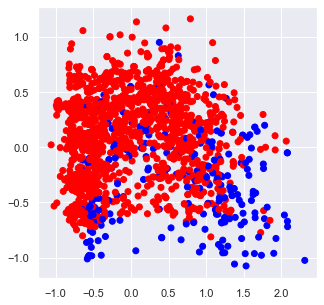

In [72]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = pca_df['Response'].map(colordict))